# Using Daymet data from ORNL webservice

Daymet is a a daily gridded weather dataset distributed through the ORNL DAAC
https://daymet.ornl.gov/

As part of their tools for obtaining data they have created a webservice that allows one to download a timeseries of temperature and precipitation for any location in the US.

functions in pyDaymet allow for painless use of this service

In [1]:
import daymetpy

In [2]:
ornl_lat, ornl_long = 35.9313167, -84.3104124
df = daymetpy.download_Daymet(lon=ornl_long, lat=ornl_lat, start_yr=2012, end_yr=2014)

### Which gives us a nice data frame with weather data for the Oak Ridge National Lab

In [3]:
df.head()

,year,yday,dayl,prcp,srad,swe,tmax,tmin,vp
2012-01-01,2012,1,34560,3,204.8,0,15.0,0.5,640
2012-01-02,2012,2,34560,2,278.4,0,11.5,-3.0,480
2012-01-03,2012,3,34560,0,204.8,0,1.5,-7.0,360
2012-01-04,2012,4,34560,0,252.8,0,3.0,-8.5,320
2012-01-05,2012,5,34906,0,288.0,0,9.5,-5.5,400


## Which we can visualize using matplotlib and seaborn

In [4]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

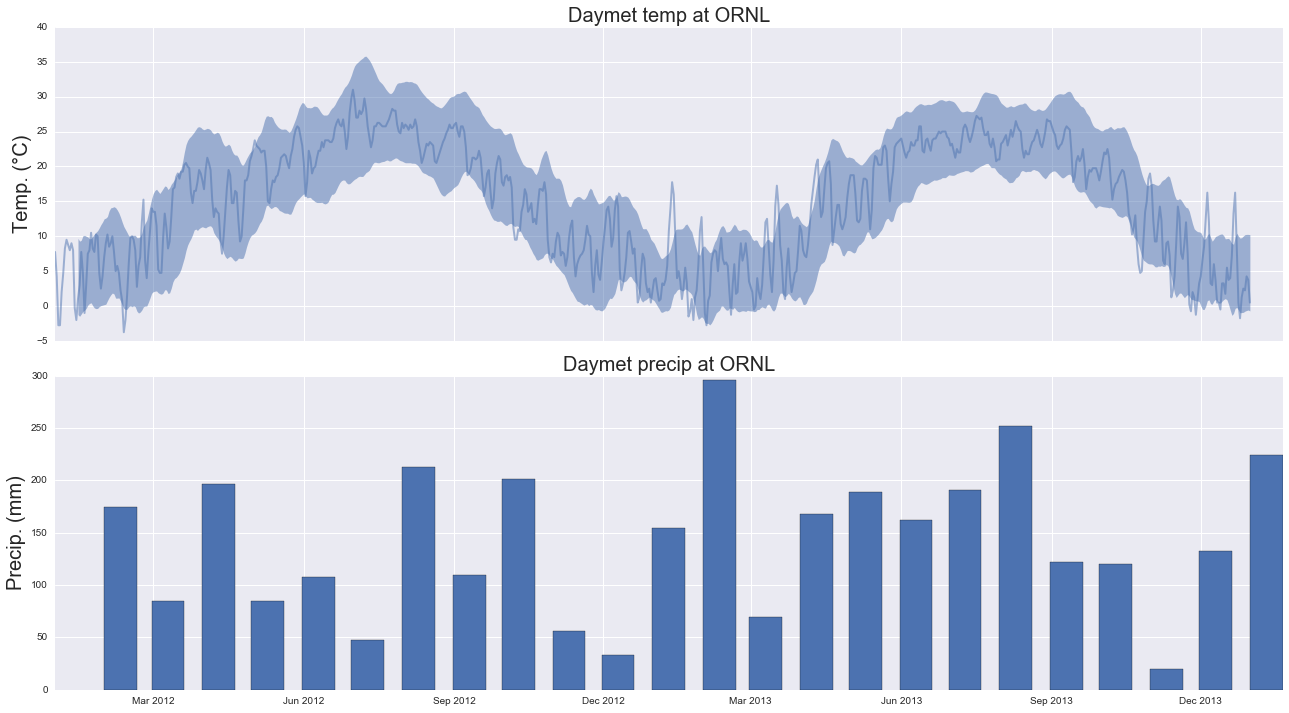

In [5]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(2, figsize=(18, 10), sharex=True)
rolling3day = pd.rolling_mean(df, 15)
ax1.fill_between(rolling3day.index, rolling3day.tmin, rolling3day.tmax, alpha=0.5, lw=0)
ax1.plot(df.index, df[['tmax', 'tmin']].mean(axis=1), lw=2, alpha=0.5)

ax1.set_title('Daymet temp at ORNL', fontsize=20)
ax1.set_ylabel(u'Temp. (°C)', fontsize=20)

monthlysum = df.resample("M", how='sum')
ax2.bar(monthlysum.index, monthlysum.prcp, width=20,)
ax2.set_title('Daymet precip at ORNL', fontsize=20)
ax2.set_ylabel(u'Precip. (mm)', fontsize=20)

fig.tight_layout()

# Is the temperature different between Denver and Miami?

In [6]:
denver_loc = (-104.9903, 39.7392)
miami_loc = (-80.2089, 25.7753)

denver = daymetpy.download_Daymet(lon=denver_loc[0], lat=denver_loc[1], start_yr=2012, end_yr=2014)
miami = daymetpy.download_Daymet(lon=miami_loc[0], lat=miami_loc[1], start_yr=2012, end_yr=2014)

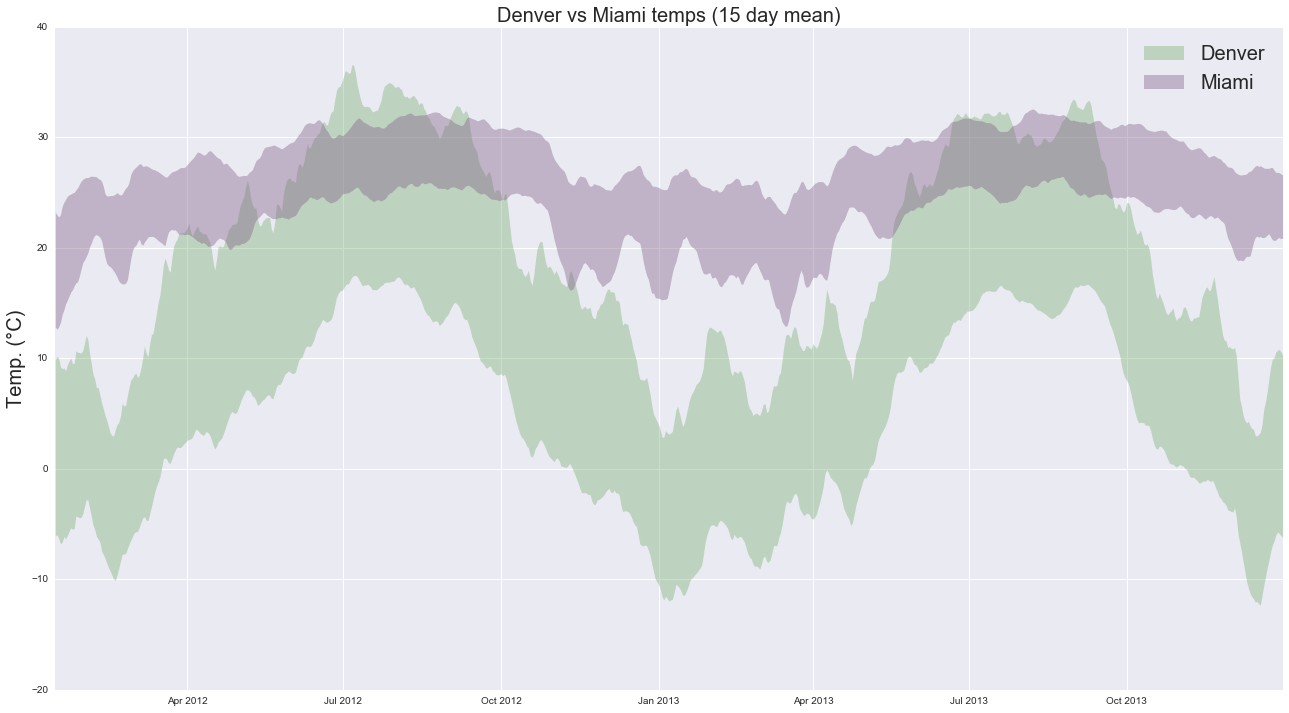

In [7]:
fig, ax1 = plt.subplots(1, figsize=(18, 10))
rolling3day = pd.rolling_mean(denver, 15)
ax1.fill_between(rolling3day.index, rolling3day.tmin, rolling3day.tmax, 
                 alpha=0.4, lw=0, label='Denver', color=sns.xkcd_palette(['faded green'])[0])

ax1.set_title('Denver vs Miami temps (15 day mean)', fontsize=20)

rolling3day = pd.rolling_mean(miami, 15)
ax1.fill_between(rolling3day.index, rolling3day.tmin, rolling3day.tmax, 
                 alpha=0.4, lw=0, label='Miami', color=sns.xkcd_palette(['dusty purple'])[0])

ax1.set_ylabel(u'Temp. (°C)', fontsize=20)
fig.tight_layout()
plt.legend(fontsize=20)